In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import plot_tree


In [2]:
df = pd.read_csv('Data/selected_features.csv')

In [3]:
df.head()

,NACCID,CDRSUM,DECIN,MOSLOW,MEMORY,SPEECH,BILLS,TRAVEL,MOFALLS,MOTREM,...,TOBAC30,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOHOL,DIABETES,HYPERTEN,CVHATT,SEX
0,NACC235922,3.5,1,0,1.0,-4,1,0,0,0,...,0,1,22,2,40,0,0,1,0,2
1,NACC383757,0.5,8,0,0.5,-4,0,0,0,0,...,0,1,15,5,28,2,0,1,0,1
2,NACC418253,2.0,1,0,1.0,-4,0,0,0,0,...,0,1,10,2,30,0,0,0,0,2
3,NACC433163,0.5,1,0,0.5,-4,8,0,0,1,...,0,1,2,2,17,0,0,0,0,1
4,NACC476187,5.0,1,0,1.0,-4,3,3,0,0,...,0,1,25,2,45,0,0,1,0,1


In [4]:
df = df.drop('NACCID', axis=1)

**Linear Regression**

In [5]:
#dummy coding categorical variables
df_encoded = pd.get_dummies(df, columns=['SEX', 'TOBAC30', 'TOBAC100', 'ALCOHOL', 'DIABETES', 'HYPERTEN', 'CVHATT', 'DECIN', 'MOSLOW', 'MEMORY', 'SPEECH', 'BILLS', 'TRAVEL', 'MOFALLS', 'MOTREM'], drop_first=True)
y = df_encoded['CDRSUM']
X = df_encoded.drop(columns=['CDRSUM'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Once the model is trained, you can make predictions on the test data
predictions = model.predict(X_test)

In [7]:
print('model intercept :', model.intercept_) 
print('model coefficients : ', model.coef_) 
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

model intercept : -0.6478909571392502
model coefficients :  [-4.92143018e-03  2.30510592e-03  3.36029315e-03  6.38953729e-03
 -1.85078725e-03 -6.73891172e-02 -1.52729421e-02  2.42826573e-02
  1.06026135e+00  1.23399245e+00  1.15816289e-01  9.00604315e-02
 -6.68366980e-01  1.43187531e-02  1.19899009e-01 -1.85863447e-01
 -8.99719864e-03 -2.91861827e-03  2.82636735e-01 -2.49965792e-01
 -6.44238763e-03 -3.65654584e-01  1.38055139e-01 -1.53682661e-02
  6.69278757e-03  3.27659648e-01 -1.22924783e-01  7.62181583e-01
  2.78859383e+00  6.68046904e+00  1.19121448e+01  4.43175975e-02
  8.49283917e-02  6.50359197e-01  1.62483121e+00  2.99179363e+00
  1.79084529e+00 -3.00287251e-02  5.59773103e-02  3.85432470e-01
  1.11253406e+00  4.49824516e-01 -4.41892092e-02 -1.12589757e-01
  1.26846058e-01  5.44820099e-01  1.60634405e+00  2.33514134e-01
 -4.69384166e-01  5.79410179e-01  5.29548656e-01 -1.53173162e-01
 -4.11361988e-01]
Mean Squared Error (MSE): 0.7459778745788458
R-squared: 0.9130803861566441
Me

TypeError: ylabel() missing 1 required positional argument: 'ylabel'

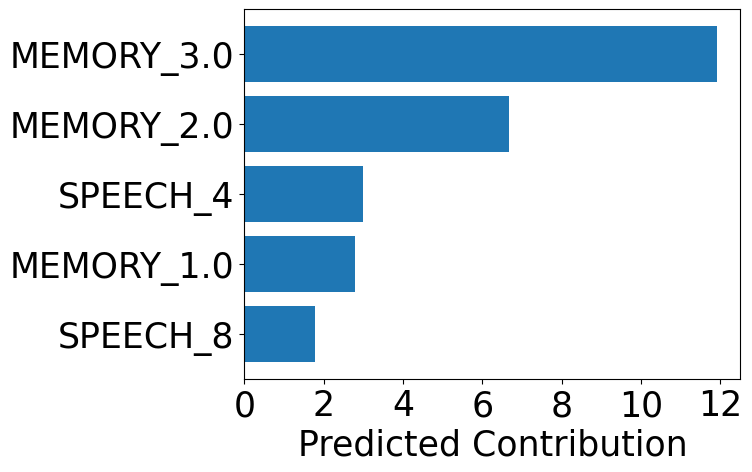

In [8]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)

top_5 = coef_df_sorted.head(5)

# Plot

plt.barh(top_5['Feature'], top_5['Coefficient'])
plt.xlabel(xlabel = 'Predicted Contribution', size= 25)
plt.gca().invert_yaxis()  
plt.xticks(size= 25)
plt.yticks(size= 25)
plt.ylabel( size= 25)
plt.show()

plt.show()

**Random Forest**

**100 trees**

In [9]:

# Create a RandomForestRegressor object
model2 = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees with n_estimators

# Fit the model to the training data
model2.fit(X_train, y_train)

# Make predictions on the test data
predictions = model2.predict(X_test)

In [10]:
# Calculate evaluation metrics
mse_2 = mean_squared_error(y_test, predictions)
r2_2 = r2_score(y_test, predictions)
mae_2 = mean_absolute_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse_2)
print("R-squared:", r2_2)
print("Mean Absolute Error (MAE):", mae_2)

Mean Squared Error (MSE): 0.4236899561723886
R-squared: 0.9506326278100357
Mean Absolute Error (MAE): 0.25998295592890186


TypeError: ylabel() missing 1 required positional argument: 'ylabel'

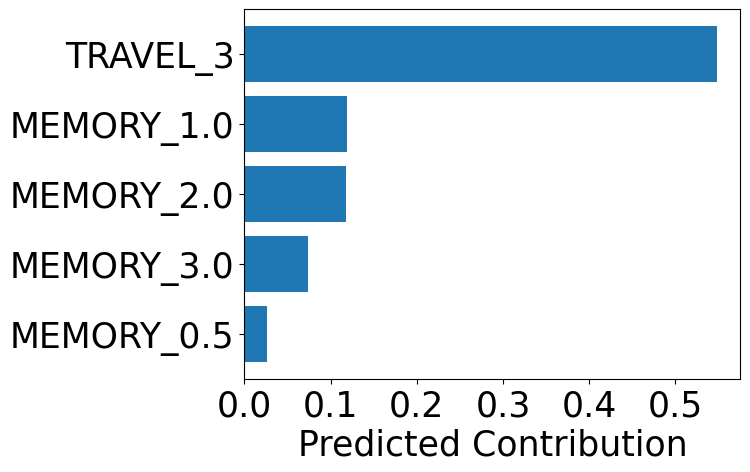

In [11]:
feature_importances = model2.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Plot

plt.barh(importance_df_sorted['Feature'][:5], importance_df_sorted['Importance'][:5])
plt.xlabel(xlabel = 'Predicted Contribution', size= 25)
plt.gca().invert_yaxis()  
plt.xticks(size= 25)
plt.yticks(size= 25)
plt.ylabel( size= 25)
plt.show()

plt.show()

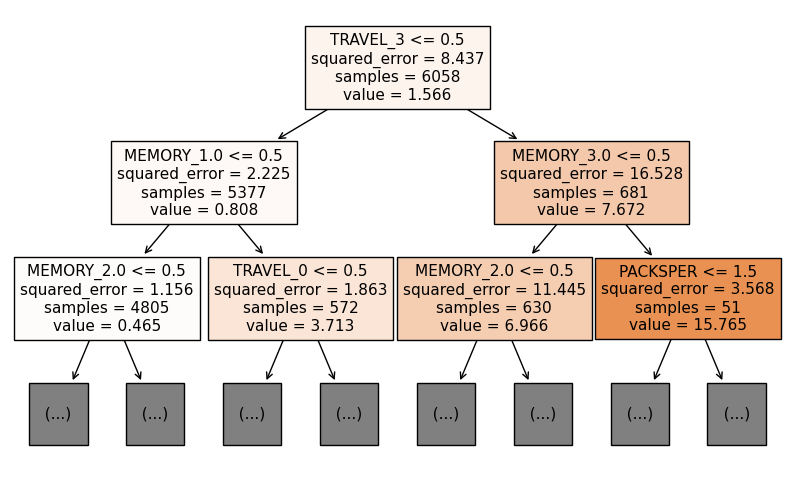

In [14]:
tree_to_plot = model2.estimators_[0]

# Plot the selected tree
plt.figure(figsize=(10,6))
plot_tree(tree_to_plot, filled=True, feature_names=X_train.columns, max_depth=2)
# Modify text properties in the plotted tree
for text in plt.gca().texts:
    text.set_fontsize(11)  # Adjust the fontsize as needed


plt.show()

**150 trees**

In [15]:

# Create a RandomForestRegressor object
model3 = RandomForestRegressor(n_estimators=150, random_state=42)  # You can adjust the number of trees with n_estimators

# Fit the model to the training data
model3.fit(X_train, y_train)

# Make predictions on the test data
predictions = model3.predict(X_test)

In [16]:
# Calculate evaluation metrics
mse_3 = mean_squared_error(y_test, predictions)
r2_3 = r2_score(y_test, predictions)
mae_3 = mean_absolute_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse_3)
print("R-squared:", r2_3)
print("Mean Absolute Error (MAE):", mae_3)

Mean Squared Error (MSE): 0.4208485485485486
R-squared: 0.950963702044074
Mean Absolute Error (MAE): 0.2588353218082948


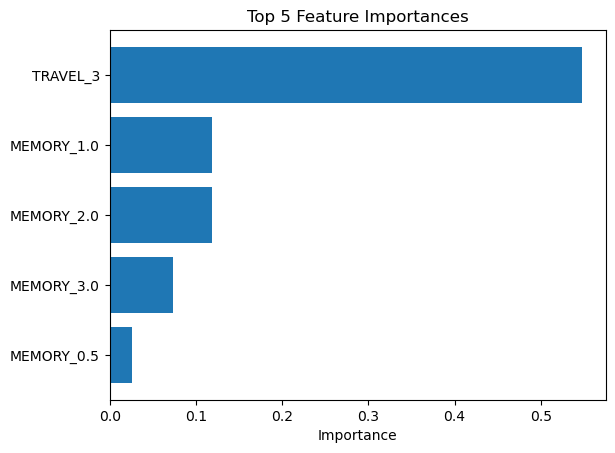

In [17]:
feature_importances = model3.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Plot

plt.barh(importance_df_sorted['Feature'][:5], importance_df_sorted['Importance'][:5])
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances')
plt.gca().invert_yaxis()  
plt.show()

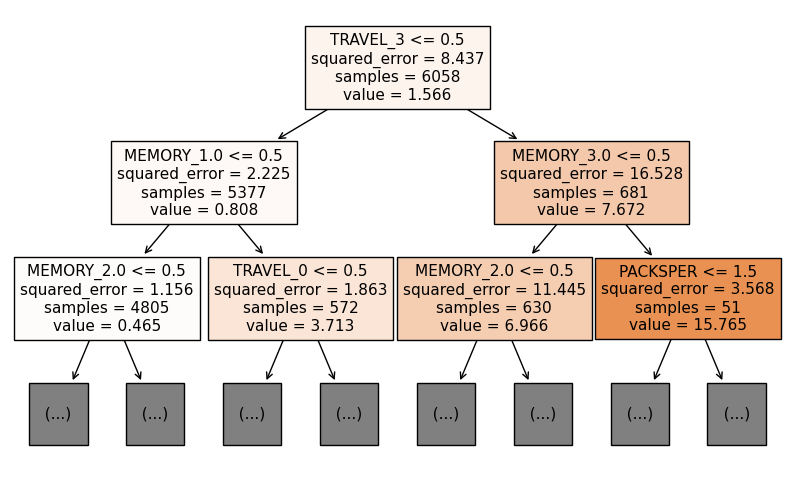

In [18]:
tree_to_plot = model3.estimators_[0]

# Plot the selected tree
plt.figure(figsize=(10,6))
plot_tree(tree_to_plot, filled=True, feature_names=X_train.columns, max_depth=2)
# Modify text properties in the plotted tree
for text in plt.gca().texts:
    text.set_fontsize(11)  # Adjust the fontsize as needed


plt.show()

# SVR and LASSO

In [19]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr_model.fit(X_train, y_train)

y_test_pred = svr_model.predict(X_test)

# Evaluate 
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error: 1.9751848848734121
R-squared Score: 0.7698560328490219
Mean Absolute Error (MAE): 0.5586372747400075


In [20]:
from sklearn.linear_model import Lasso


lasso_model = Lasso()  
lasso_model.fit(X_train, y_train)

y_test_pred = lasso_model.predict(X_test)

# Evaluate 
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error: 8.484787891589523
R-squared Score: 0.011372170392978553
Mean Absolute Error (MAE): 1.9549094829366036
